<a target="_blank" href="https://colab.research.google.com/github/da-python/new-modul-python/blob/main/Lesson2/hometask/HH-api-hometask.ipynb">


<a target="_blank" href="https://colab.research.google.com/github/da-python/new-modul-python/blob/main/Lesson2/hometask/HH-api-hometask.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Задание
* Cкачайте все вакансии СБЕРа из api hh.ru (https://github.com/hhru/api у апи есть ограничение в 2000, подумайте как его обойти)
* Извлеките все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
* Создайте DataFrame в котором будут даты публикации вакансий, названия, описания,  только добавьте поле ключевые навыки
* Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите вакансии с использованием python, которые вам интересны
* Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
* Постройте график наиболее востребованных навыков

** В случае ответов от api.hh.ru с ошибками типа "Captcha" постарайтесь их обработать, например, с помощью time.sleep или изменения ip-адреса

In [10]:
import requests
from tqdm.auto import tqdm
import pandas as pd
import numpy as np
import os
from datetime import datetime
from operator import itemgetter
import time

In [13]:
sber = '3529'
page = 1
num_per_page = 100
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}'

In [16]:
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
vac_num = [el.get('id') for el in vacancies.get('items')]

In [18]:
all_vac = []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}'
    res = requests.get(url)
    vacancies = res.json()
    vac_num = [el.get('id') for el in vacancies.get('items')]
    all_vac.extend(vac_num)

  0%|          | 0/20 [00:00<?, ?it/s]

In [19]:
len(all_vac)

2000

In [20]:
vacancy_all = [] #Полное описание
for ii in range(10): 
    x=100*ii
    ii+=1
    y=100*ii
    for i in range(x, y): 
        vac_id = all_vac[i]
        url = f'https://api.hh.ru/vacancies/{vac_id}'
        res = requests.get(url)
        vacancy = res.json()
        vacancy_all.append(vacancy)
    print(ii)
    time.sleep(150)

1
2
3
4
5
6
7
8
9
10


In [21]:
vacancies.get('items')[0]

{'id': '78740289',
 'premium': False,
 'name': 'Старший клиентский менеджер',
 'department': {'id': '3529-3529-clients', 'name': 'Сбер. Работа с клиентами'},
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '4740',
  'name': 'Туринская Слобода',
  'url': 'https://api.hh.ru/areas/4740'},
 'salary': {'from': 43200, 'to': None, 'currency': 'RUR', 'gross': True},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Туринская Слобода',
  'street': None,
  'building': None,
  'lat': 57.618057,
  'lng': 64.387467,
  'description': None,
  'raw': 'Туринская Слобода',
  'metro': None,
  'metro_stations': [],
  'id': '13020949'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-03-30T17:31:27+0300',
 'created_at': '2023-03-30T17:31:27+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=78740289',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/78740289?host=hh.ru',


In [22]:
len(vacancies.get('items'))

100

In [23]:
vacancies.get('found')

6843

In [24]:
vac_information = pd.DataFrame(vacancy_all, columns = ['name','id','description','published_at','key_skills'])

In [25]:
def convert_datetime(x): 
    if type(x)==str:
        new_d = datetime.strptime(x[:10], '%Y-%m-%d')
        return new_d
    else :
        new_d = None 
        return new_d

In [26]:
vac_information['published_at'] = pd.to_datetime(vac_information['published_at'].apply(convert_datetime)) 

In [27]:
print(vac_information)

                                                  name        id  \
0                     Старший менеджер по обслуживанию  77826805   
1                   Редактор - корректор (SberDevices)  78928835   
2         Стажёр по направлению "Право" от SBERSEASONS  78861139   
3                                 Frontend-разработчик  78953673   
4    Стажёр по направлению "JavaScript" от SBERSEASONS  78861166   
..                                                 ...       ...   
995                                Middle Data Analyst  78352799   
996                        Старший клиентский менеджер  78762597   
997  Клиентский менеджер по работе с корпоративными...  69365297   
998                                           Аналитик  76038532   
999                                    Удаленный агент  77646233   

                                           description published_at  \
0    <p>Сбер — лучший работодатель России. У нас 14...   2023-03-09   
1    <p><strong>SberDevices</strong> – са

In [28]:
vac_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          1000 non-null   object        
 1   id            1000 non-null   object        
 2   description   1000 non-null   object        
 3   published_at  1000 non-null   datetime64[ns]
 4   key_skills    1000 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 39.2+ KB


In [29]:
vac_date = vac_information.groupby(['published_at']).count()

In [30]:
vac_date_plot = pd.DataFrame(vac_date, columns = ['id'])

<Axes: xlabel='published_at'>

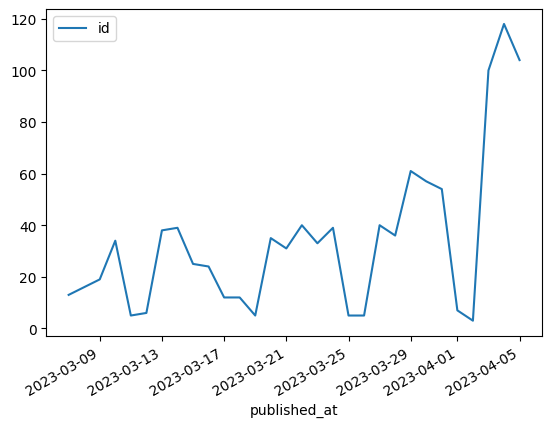

In [31]:
vac_date_plot.plot()

In [34]:
vac_week = pd.DataFrame(vacancy_all, columns = ['name','id','description','published_at','key_skills'])

In [35]:
def convert_date_week(x):
    if type(x)==str:
        new_d = datetime.weekday(datetime.strptime(x[:10], '%Y-%m-%d'))
        return new_d
    else :
        new_d = 6 
        return new_d

In [36]:
vac_week['published_at'] = vac_week['published_at'].apply(convert_date_week).astype(int)

In [37]:
vac_week_count = vac_week.groupby(['published_at']).count()
vac_week_count 

,name,id,description,key_skills
published_at,,,,
0,213,213,213,213
1,237,237,237,237
2,230,230,230,230
3,133,133,133,133
4,139,139,139,139
5,29,29,29,29
6,19,19,19,19


In [38]:
#определите день недели, в который больше всего публикуют вакансий. Ответ - ВТ
vac_week_count.max()

name           237
id             237
description    237
key_skills     237
dtype: int64

In [39]:
vac_fav = pd.DataFrame(vacancy_all, columns = ['name','id','description','published_at','key_skills'])

In [40]:
vac_withpython = []
for i in range(len(vac_fav)):
    if type(vac_fav['name'][i]) == str:
        if ('Python' in vac_fav['name'][i]) == True:
            vac_withpython.append(vac_fav['name'][i])

In [41]:
print(vac_withpython)

['Python разработчик', 'Python разработчик', 'Стажер (разработчик Python)', 'Python разработчик (backend)', 'Аналитик данных со знанием Python', 'Разработчик ИСУ (SQL/Python)', 'Разработчик Python', 'Python-разработчик', 'Python Developer', 'Python разработчик (Брокерский бизнес)', 'Python developer', 'Python-разработчик', 'Python Developer в омниканальные контактные центры', 'Middle/Senior Python-разработчик в Цифровые поверхности Салют (SberDevices)', 'Python-разработчик', 'Python-разработчик', 'Python разработчик (Биометрия)', 'Senior Python Engineer в инфраструктуру поиска', 'Специалист по оптимизации процессов со знанием Python', 'Python-разработчик в Цифровые поверхности Салют (Сценарная разработка)', 'Python-разработчик']


In [ ]:
vac_necskill = pd.DataFrame(vacancy_all, columns = ['name','id','description','published_at','key_skills'])